In [5]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sb

In [6]:
smartphones = pd.read_csv('smartphones.csv')

In [7]:
smartphones

,Name,OS,Capacity,Ram,Weight,Company,inch
0,Galaxy S10,Android,128,8,163.0,Samsung,6.2
1,Lumia 950,windows,32,3,150.0,Microsoft,5.2
2,Xpreia 1 ll,Android,256,8,181.0,Sony,6.5
3,iphone 7,ios,128,2,138.0,Apple,4.7
4,U Ultra,Android,64,4,170.0,HTC,5.7
5,Galaxy S5,Android,16,2,145.0,Samsung,5.1
6,iphone 11 pro max,ios,256,4,226.0,Apple,6.5
7,Moto G5,Android,16,3,144.5,Motorola,5.0
8,Pixel,Android,128,4,143.0,Google,5.0


In [10]:
ram_counts=smartphones.Ram.value_counts()
ram_counts

Ram
4    3
8    2
3    2
2    2
Name: count, dtype: int64

([<matplotlib.axis.YTick at 0x703e7588caa0>,
 [Text(0, 1, '1'), Text(0, 2, '2'), Text(0, 3, '3')])

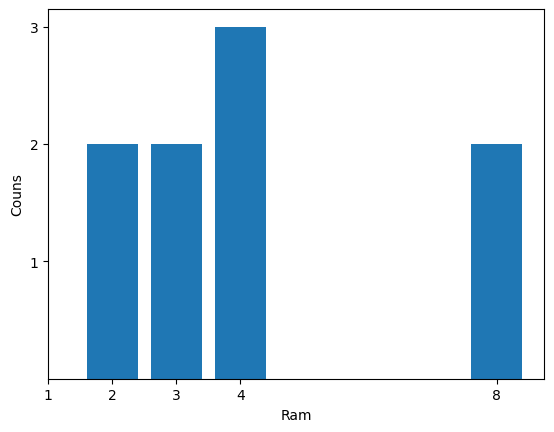

In [29]:
plt.bar(ram_counts.index,ram_counts)
plt.xlabel('Ram')
plt.ylabel('Couns')
plt.xticks([1,2,3,4,8])
plt.yticks([1,2,3])

In [35]:
def ecdf (data):
    n=len(data)
    x=np.sort(data)
    y=np.arange(1,n+1)/n
    return x,y

In [36]:
x,y=ecdf(smartphones.inch)

In [67]:
x

array([4.7, 5. , 5. , 5.1, 5.2, 5.7, 6.2, 6.5, 6.5])

In [38]:
y

array([0.11111111, 0.22222222, 0.33333333, 0.44444444, 0.55555556,
       0.66666667, 0.77777778, 0.88888889, 1.        ])

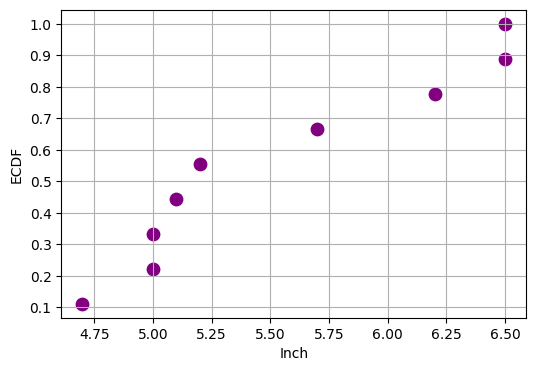

In [61]:
plt.figure(figsize=(6,4))
plt.scatter(x,y,s=80,c='purple')
#plt.margins(.1)
plt.xlabel('Inch')
plt.ylabel('ECDF')
plt.yticks([.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
plt.grid()

In [55]:
smartphones

,Name,OS,Capacity,Ram,Weight,Company,inch
0,Galaxy S10,Android,128,8,163.0,Samsung,6.2
1,Lumia 950,windows,32,3,150.0,Microsoft,5.2
2,Xpreia 1 ll,Android,256,8,181.0,Sony,6.5
3,iphone 7,ios,128,2,138.0,Apple,4.7
4,U Ultra,Android,64,4,170.0,HTC,5.7
5,Galaxy S5,Android,16,2,145.0,Samsung,5.1
6,iphone 11 pro max,ios,256,4,226.0,Apple,6.5
7,Moto G5,Android,16,3,144.5,Motorola,5.0
8,Pixel,Android,128,4,143.0,Google,5.0


In [68]:
np.mean(smartphones.inch)

5.544444444444445

In [70]:
np.median(smartphones.inch)

5.2

In [71]:
np.var(smartphones.inch)

0.43358024691358027

In [72]:
np.cov(smartphones.inch)

array(0.48777778)

In [73]:
np.std(smartphones.inch)

0.6584681062235135

In [84]:
np.quantile(smartphones.inch,[0,.25,.5,.75,1])

array([4.7, 5. , 5.2, 6.2, 6.5])

In [87]:
np.percentile(smartphones.inch,[0,25,50,75,100])

array([4.7, 5. , 5.2, 6.2, 6.5])

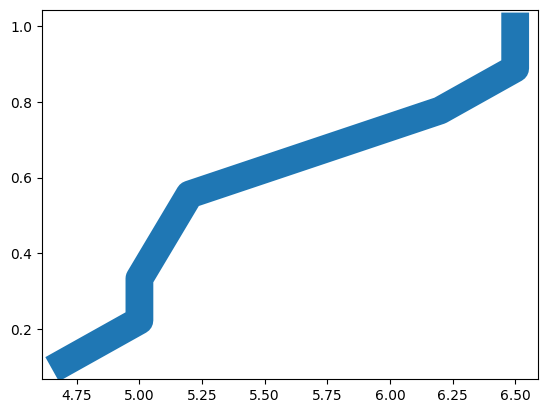

In [100]:
plt.plot(x,y,lw=20)

Text(0, 0.5, 'Weight')

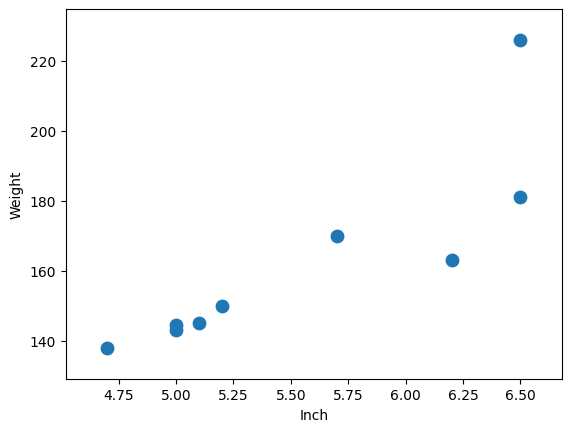

In [102]:
plt.scatter(smartphones.inch,smartphones.Weight,s=80)
plt.margins(.1)
plt.xlabel('Inch')
plt.ylabel('Weight')

In [103]:
np.cov(smartphones.inch,smartphones.Weight)

array([[4.87777778e-01, 1.66298611e+01],
       [1.66298611e+01, 7.74694444e+02]])

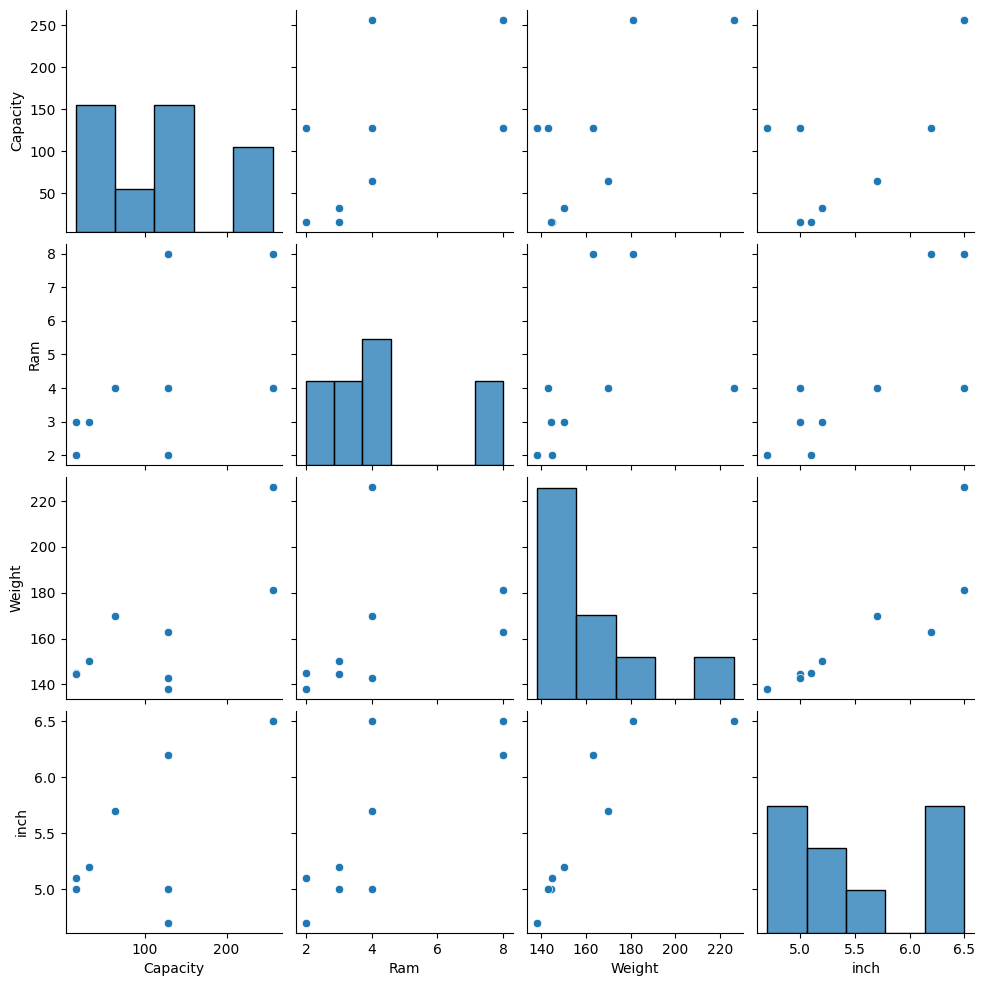

In [104]:
sb.pairplot(smartphones)

In [107]:
from scipy.stats import pearsonr

In [176]:
pearson_coef,pearson_p_value=pearsonr(smartphones.inch,smartphones.Weight)

In [177]:
pearson_coef,pearson_p_value

(0.8554849938477146, 0.0032702598235448627)

In [134]:
smartphones.shape

(9, 7)

In [156]:
smartphones_numerical= smartphones[['Ram','Capacity','inch','Weight']]

In [157]:
smartphones_numerical


,Ram,Capacity,inch,Weight
0,8,128,6.2,163.0
1,3,32,5.2,150.0
2,8,256,6.5,181.0
3,2,128,4.7,138.0
4,4,64,5.7,170.0
5,2,16,5.1,145.0
6,4,256,6.5,226.0
7,3,16,5.0,144.5
8,4,128,5.0,143.0


In [160]:
cor_coef=smartphones_numerical.corr()

In [161]:
cor_coef

,Ram,Capacity,inch,Weight
Ram,1.000000,0.572842,0.778309,0.376255
Capacity,0.572842,1.000000,0.727581,0.731434
inch,0.778309,0.727581,1.000000,0.855485
Weight,0.376255,0.731434,0.855485,1.000000


<Axes: >

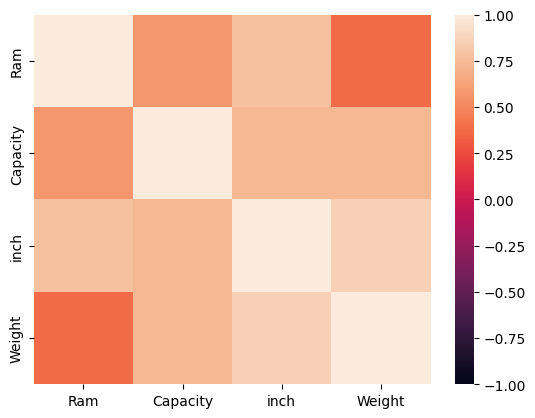

In [167]:
sb.heatmap(cor_coef,vmax=1,vmin=-1)


In [171]:
np.cov(smartphones.inch,smartphones.Weight)

array([[4.87777778e-01, 1.66298611e+01],
       [1.66298611e+01, 7.74694444e+02]])

<Axes: >

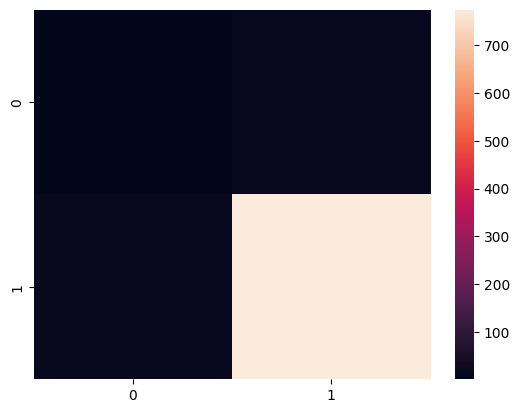

In [170]:
sb.heatmap(np.cov(smartphones.inch,smartphones.Weight))

In [172]:
from scipy.stats import spearmanr

In [178]:
spearman_coef,spearman_p_value=spearmanr(smartphones.Ram,smartphones.Capacity)

In [179]:
spearman_coef,spearman_p_value

(0.6387727180404934, 0.06405417734095313)

<Axes: >

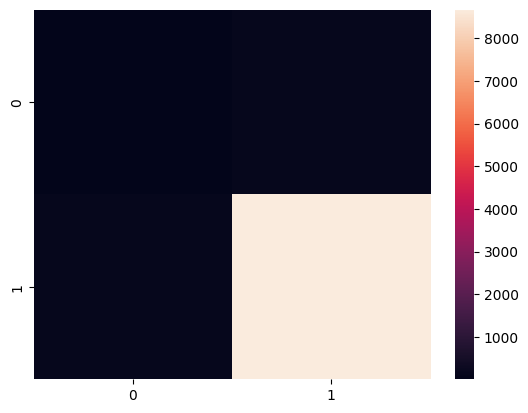

In [185]:
sb.heatmap(np.cov(smartphones.Ram,smartphones.Capacity))

In [186]:
from scipy.stats import chi2_contingency

In [188]:
observed_table=pd.crosstab(smartphones.Ram,smartphones.Capacity)

In [195]:
observed_table

Capacity,16,32,64,128,256
Ram,,,,,
2,1,0,0,1,0
3,1,1,0,0,0
4,0,0,1,1,1
8,0,0,0,1,1


In [197]:
chi_square,chi_square_p_value,dof,expected_table= chi2_contingency(observed_table.values)

In [198]:
chi_square

10.749999999999998

In [199]:
chi_square_p_value

0.5504565631940779

In [200]:
dof

12

In [204]:
expected_table

array([[0.44444444, 0.22222222, 0.22222222, 0.66666667, 0.44444444],
       [0.44444444, 0.22222222, 0.22222222, 0.66666667, 0.44444444],
       [0.66666667, 0.33333333, 0.33333333, 1.        , 0.66666667],
       [0.44444444, 0.22222222, 0.22222222, 0.66666667, 0.44444444]])

In [259]:
#np.random.seed(42)
random_number=np.random.rand(1000)
head=np.sum(random_number>.5)
print(head),print(head/1000)

505
0.505


(None, None)

<Axes: ylabel='Count'>

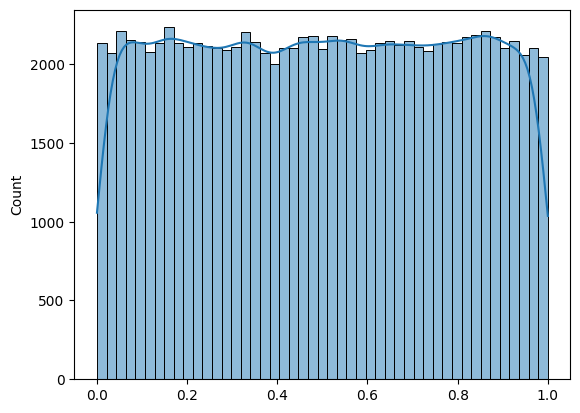

In [261]:
sb.histplot(np.random.random(100000),kde=True)

<Axes: ylabel='Count'>

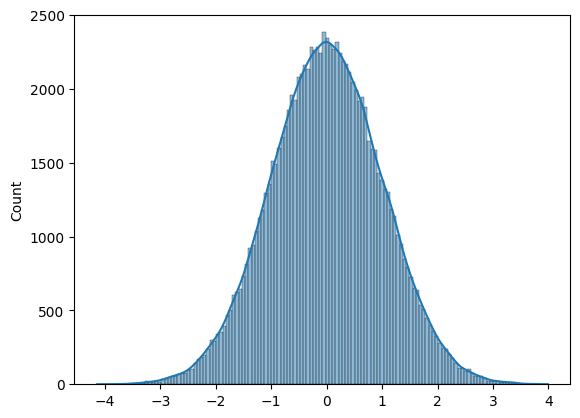

In [269]:
sb.histplot(np.random.normal(0,1,100000),kde=True)

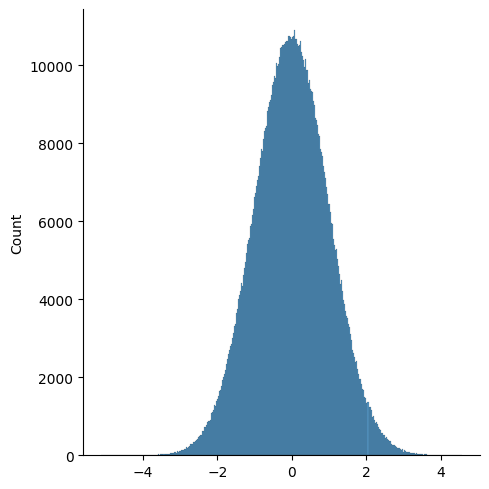

In [279]:
sb.displot(np.random.normal(0,1,1000000))

/tmp/ipykernel_6694/3366590367.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(np.random.normal(0,1,10000))


<Axes: ylabel='Density'>

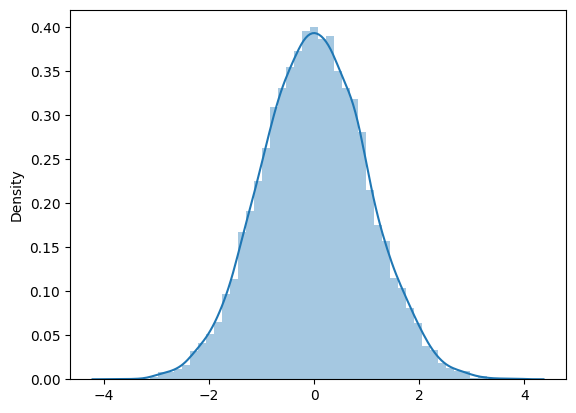

In [278]:
sb.distplot(np.random.normal(0,1,10000))

In [271]:
sb.__version__

'0.13.2'